In [128]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from bs4 import BeautifulSoup
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pd

In [100]:
username = 'Hrygduhfi'
password = 'Paawan@123'

In [101]:
driver = webdriver.Chrome()
driver.get("https://www.instagram.com/")
driver.maximize_window()

In [102]:
wait = WebDriverWait(driver,20)

In [103]:
wait.until(EC.presence_of_element_located((By.NAME,'username'))).send_keys(username)
wait.until(EC.presence_of_element_located((By.NAME,'password'))).send_keys(password)
wait.until(EC.presence_of_element_located((By.XPATH,'//*[@id="loginForm"]/div/div[3]/button'))).click()
wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_ac8f'))).click()
wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_a9--'))).click()

Problem 1

1. From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [240]:
div = driver.find_elements('tag name', "svg")
div[2].click()
time.sleep(2)
Search = driver.find_elements('tag name','input')
Search[0].send_keys("food")

In [104]:
def Search(string,n):
    User_Handle={}
    wait.until(EC.presence_of_element_located((By.XPATH,'/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[1]/div[1]/div/div/div/div/div[2]/div[2]/span/div'))).click()
    search_input = wait.until(EC.presence_of_element_located((By.XPATH,'//input[@placeholder="Search"]')))
    #search_input.clear()
    search_input.send_keys(string)
    userId = wait.until(EC.presence_of_all_elements_located((By.XPATH,'/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[1]/div[1]/div/div/div[2]/div/div/div[2]/div/div/div[2]/div/a')))

    base_url = "https://instagram.com"

    # store user handle with their handle link
    count=0
    for i in userId:
        
        if count>=n:
            break
        html_content=i.get_attribute('outerHTML')
        User_Link = BeautifulSoup(html_content,'html.parser').a['href']
        Get_User_Handle = User_Link.split('/')[1]
        if Get_User_Handle!='explore':
            User_Handle[Get_User_Handle]=base_url+User_Link
            count+=1
    
            
    return User_Handle

In [105]:
User_Ids = Search("food",10)

In [106]:
User_Ids

{'foodtalkindia': 'https://instagram.com/foodtalkindia/',
 '_food_entertainment': 'https://instagram.com/_food_entertainment/',
 'punjabi_food_factory': 'https://instagram.com/punjabi_food_factory/',
 'foodbloggerandrea': 'https://instagram.com/foodbloggerandrea/',
 'dilsefoodie': 'https://instagram.com/dilsefoodie/',
 'pune_food_blogger': 'https://instagram.com/pune_food_blogger/',
 'food': 'https://instagram.com/food/',
 'bhukkad_chandigarians': 'https://instagram.com/bhukkad_chandigarians/',
 'mumbaifoodjunkie': 'https://instagram.com/mumbaifoodjunkie/',
 'food_lunatic': 'https://instagram.com/food_lunatic/'}

In [107]:
def Count_Followers(user_Handle_link):
    driver.get(user_Handle_link)
    time.sleep(2)
    data = wait.until(EC.presence_of_element_located((By.PARTIAL_LINK_TEXT,'followers')))
    Follower_count = BeautifulSoup(data.get_attribute('outerHTML'),'html.parser').span['title']
    Follower_count=int(Follower_count.replace(',',''))
    return Follower_count

In [108]:
Followers_of_user = {}
for user_Id,Link in User_Ids.items():
    follower = Count_Followers(Link)
    Followers_of_user[user_Id]=follower
Top_5_handle=[]
Top_5_followed_user={}
Followers = sorted(Followers_of_user.items(), key=lambda x: x[1], reverse=True)[:5] # Sort based on values
for i in Followers:
    print(i[0],'--->',i[1],'Followers')
    Top_5_followed_user[i[0]]=i[1]
    Top_5_handle.append(i[0])

dilsefoodie ---> 1243815 Followers
foodtalkindia ---> 308752 Followers
food_lunatic ---> 233638 Followers
pune_food_blogger ---> 219396 Followers
food ---> 182041 Followers


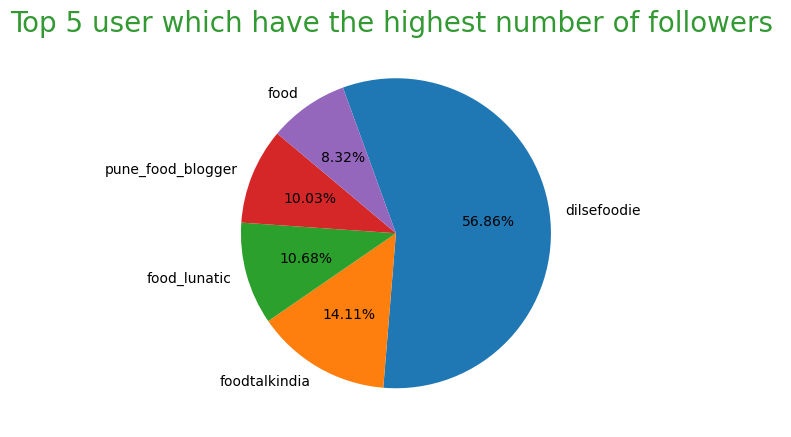

In [109]:
count = list(Top_5_followed_user.values())
userId = list(Top_5_followed_user.keys())

plt.figure(figsize=(5,10))
plt.pie(count,labels=userId,autopct="%.2f%%",counterclock=False,startangle=110)
plt.title('Top 5 user which have the highest number of followers ',fontsize=20, color='green',alpha=0.8)
plt.show()

2. Now Find the number of posts these handles have done in the previous 3 days.

In [110]:
def Number_of_Post(user_url,No_of_Days):
        
    driver.get(user_url)
    time.sleep(2)
    First_Post = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_aagw')))
    First_Post.click()
    no_of_post=0
    while True:
        time_of_post = wait.until(EC.presence_of_element_located((By.XPATH,'//time[@class="x1p4m5qa"]'))).get_attribute('datetime')
        date_of_post = datetime.strptime(time_of_post[0:19], "%Y-%m-%dT%H:%M:%S")
        if (datetime.now() - date_of_post).days > No_of_Days :
            break
        else :
            no_of_post += 1

        Next_post = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_aaqg._aaqh')))
        Next_post.click()
        time.sleep(2)

    driver.back()
    return no_of_post

In [111]:
no_of_post_per_user = {}
for Id in Top_5_handle:
    user_url = User_Ids[Id]
    Post_count = Number_of_Post(user_url,3)
    no_of_post_per_user[Id] = Post_count
    
# print the user id and number of post have done by user in 3 days
for ID,Count in no_of_post_per_user.items():
    print(ID,'----->',Count,'Posts')

dilsefoodie -----> 0 Posts
foodtalkindia -----> 4 Posts
food_lunatic -----> 3 Posts
pune_food_blogger -----> 3 Posts
food -----> 0 Posts


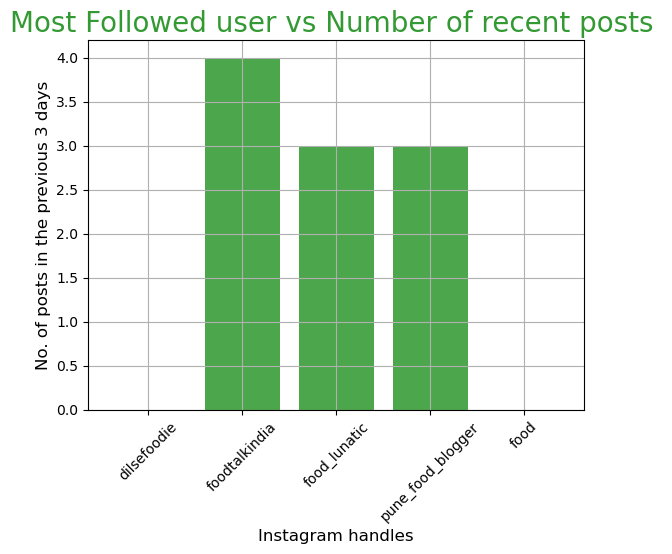

In [112]:
x = no_of_post_per_user.keys()
y = no_of_post_per_user.values()

plt.bar(x,y,color='g',alpha=0.7)
plt.ylabel("No. of posts in the previous 3 days",size=12)
plt.xlabel("Instagram handles",size=12)
plt.xticks(rotation = 45)
plt.title('Most Followed user vs Number of recent posts ',fontsize=20, color='green',alpha=0.8)
plt.grid()
plt.show()


Problem 1

1. Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [125]:
def content_of_post(user_url,No_of_post):
        
    Text_list = []
    driver.get(user_url)
    time.sleep(2)
    First_Post = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_aagw')))
    First_Post.click()
    no_of_post=0
    while True:

        HTML = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_a9zs')))
        Texts = BeautifulSoup(HTML.get_attribute('innerHTML'),'html.parser').find_all('a')
        
        # get the text
        for text in Texts:
            text=text.text
            if text[0]!='@':
                Text_list.append(text)
        no_of_post += 1
        if No_of_post==no_of_post:
            break

        Next_post = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_aaqg._aaqh')))
        Next_post.click()
        time.sleep(2)

    driver.back()
    return Text_list

In [126]:
words_of_5_user = []
for Id in Top_5_handle:
    user_url = User_Ids[Id]
    text_list = content_of_post(user_url,10)
    words_of_5_user.extend(text_list)
    print(Id,'--->',text_list)
    print()

dilsefoodie ---> ['#dilsefoodie', '#food', '#afeemhandi', '#omelette', '#streetfood', '#dilsefoodie', '#food', '#streetfood', '#cholekulche', '#harghartiranga', '#75For75', '#amritmohatsav', '#DilSeDesi', '#dilsefoodie', '#dilsefoodie', '#punjab', '#streetfood', '#lassi', '#gianilassi', '#dilsefoodie', '#food', '#nonveg', '#chicken', '#mutton', '#dilsefoodie', '#food', '#bangalore', '#nonvegfood', '#dilsefoodie', '#buffet', '#gurgaon', '#unlimitedfood', '#nonveg', '#vegetarian', '#streetfood', '#cheese', '#dilsefoodie', '#food', '#Avatara', '#dubai', '#mumbai', '#dilsefoodie', '#food', '#latenight', '#nonveg', '#dilsefoodie', '#food', '#tikkamasala', '#latenight']

foodtalkindia ---> ['#NewInTown', '#NewInTown', '#NewInTown']

food_lunatic ---> ['#wedding', '#bride', '#newlyweds', '#bridalpictures', '#whatiwore', '#photodump', '#love', '#weddingpictures', '#haldiceremony', '#weddingdiaries', '#photodump', '#bridetobe', '#family', '#weddingpictures', '#indianwedding', '#memories', '#wha

2. Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [127]:
def get_word_frequency(List_of_words):
    dct = {}
    for word in List_of_words:
        dct[word] = dct.get(word,0) + 1
    return dct

# calling the function
word_freq_dict = get_word_frequency(words_of_5_user)
word_freq_dict

{'#dilsefoodie': 10,
 '#food': 11,
 '#afeemhandi': 1,
 '#omelette': 1,
 '#streetfood': 8,
 '#cholekulche': 1,
 '#harghartiranga': 1,
 '#75For75': 1,
 '#amritmohatsav': 1,
 '#DilSeDesi': 1,
 '#punjab': 1,
 '#lassi': 1,
 '#gianilassi': 1,
 '#nonveg': 3,
 '#chicken': 1,
 '#mutton': 1,
 '#bangalore': 1,
 '#nonvegfood': 1,
 '#buffet': 1,
 '#gurgaon': 1,
 '#unlimitedfood': 1,
 '#vegetarian': 1,
 '#cheese': 2,
 '#Avatara': 1,
 '#dubai': 1,
 '#mumbai': 1,
 '#latenight': 2,
 '#tikkamasala': 1,
 '#NewInTown': 3,
 '#wedding': 1,
 '#bride': 1,
 '#newlyweds': 1,
 '#bridalpictures': 1,
 '#whatiwore': 3,
 '#photodump': 3,
 '#love': 3,
 '#weddingpictures': 3,
 '#haldiceremony': 1,
 '#weddingdiaries': 2,
 '#bridetobe': 2,
 '#family': 2,
 '#indianwedding': 2,
 '#memories': 2,
 '#mehendi': 1,
 '#tasty': 6,
 '#noida': 1,
 '#explorenoida': 1,
 '#chaat': 1,
 '#golgappe': 1,
 '#kiosk': 1,
 '#viral': 2,
 '#trending': 8,
 '#papad': 1,
 '#papaddosa': 1,
 '#dosa': 1,
 '#quickrecipe': 1,
 '#cookinghack': 1,
 '#re

In [133]:
type(word_freq_dict)

dict

3. Create a csv file with two columns : the word and its frequency

In [131]:
words = [ key for key,value in word_freq_dict.items()]
word_frequency = [ value for key,value in word_freq_dict.items()]

# Create a csv file with two columns : the word and its frequency
columns = {"Word":words,"Frequency":word_frequency}

# Create the pandas dataframe 
df = pd.DataFrame(columns)

#using .to_csv pandas function to convert dataframe to csv without Index values
df.to_csv('words_frequency.csv',index=False)

# Printing the Top 20 Row of the table
df.head(20)

,Word,Frequency
0,#dilsefoodie,10
1,#food,11
2,#afeemhandi,1
3,#omelette,1
4,#streetfood,8
5,#cholekulche,1
6,#harghartiranga,1
7,#75For75,1
8,#amritmohatsav,1
9,#DilSeDesi,1


4. Now, find the hashtags that were most popular among these bloggers

In [137]:
Sort_hasttag = sorted(word_freq_dict.items(), key=lambda x: x[1], reverse=True)
for i in Sort_hasttag:
    print(i[0],'-->',i[1],'Hashtags')

#food --> 11 Hashtags
#dilsefoodie --> 10 Hashtags
#punefoodblogger --> 10 Hashtags
#pune --> 9 Hashtags
#streetfood --> 8 Hashtags
#trending --> 8 Hashtags
#punekar --> 8 Hashtags
#explore --> 8 Hashtags
#explorepage --> 7 Hashtags
#tasty --> 6 Hashtags
#trendingreels --> 6 Hashtags
#recipe --> 5 Hashtags
#recipevideo --> 5 Hashtags
#reels --> 5 Hashtags
#reelsinstagram --> 5 Hashtags
#punecity --> 5 Hashtags
#nonveg --> 3 Hashtags
#NewInTown --> 3 Hashtags
#whatiwore --> 3 Hashtags
#photodump --> 3 Hashtags
#love --> 3 Hashtags
#weddingpictures --> 3 Hashtags
#affordable --> 3 Hashtags
#cheese --> 2 Hashtags
#latenight --> 2 Hashtags
#weddingdiaries --> 2 Hashtags
#bridetobe --> 2 Hashtags
#family --> 2 Hashtags
#indianwedding --> 2 Hashtags
#memories --> 2 Hashtags
#viral --> 2 Hashtags
#asmr --> 2 Hashtags
#trend --> 2 Hashtags
#yummy --> 2 Hashtags
#summer --> 2 Hashtags
#colddrink --> 2 Hashtags
#reelitfeelit --> 2 Hashtags
#deal --> 2 Hashtags
#pizza --> 2 Hashtags
#punefood -->

5. Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

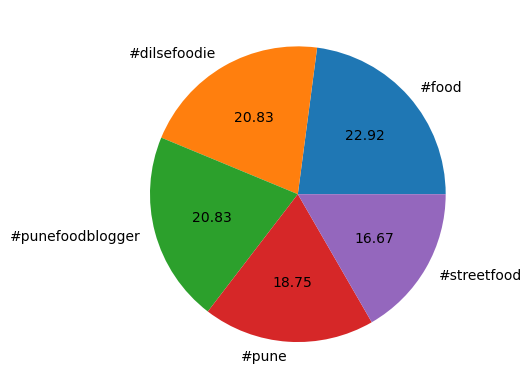

In [142]:
top_five_hastags = [ i[0] for i in Sort_hasttag[:5]]
hastag_counts = [ i[1] for i in Sort_hasttag[:5]]

plt.pie(hastag_counts,labels=top_five_hastags,autopct="%.2f")
plt.show()

Problem 3

1. Find out the likes of the top 10 posts of the 5 handles obtained earli

In [152]:
def Likes_of_post(user_url,No_of_post):
        
    Totel_Likes = 0
    driver.get(user_url)
    time.sleep(2)
    First_Post = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_aagw')))
    First_Post.click()
    no_of_post=0
    while True:

        HTML = wait.until(EC.presence_of_element_located((By.CLASS_NAME,"html-span.xdj266r.x11i5rnm.xat24cr.x1mh8g0r.xexx8yu.x4uap5.x18d9i69.xkhd6sd.x1hl2dhg.x16tdsg8.x1vvkbs")))
        # Likes = BeautifulSoup(HTML.get_attribute('innerHTML'),'html.parser').find_all('span')[-1]
        Likes = int(HTML.text.replace(',',''))
        Totel_Likes+=Likes
        no_of_post += 1
        if No_of_post==no_of_post:
            break

        Next_post = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_aaqg._aaqh')))
        Next_post.click()
        time.sleep(2)

    driver.back()
    return Totel_Likes

In [154]:
Total_likes_of_user = {}
for Id in Top_5_handle:
    user_url = User_Ids[Id]
    Total_Likes = Likes_of_post(user_url,10)
    Total_likes_of_user[Id]=Total_Likes
    print(Id,'--->',Total_Likes)

dilsefoodie ---> 57540

foodtalkindia ---> 92250

food_lunatic ---> 31090

pune_food_blogger ---> 30150

food ---> 12470



2. Calculate the average likes for a handle.

In [155]:
average_likes_dict={}
for Id,Total_Likes in Total_likes_of_user.items():
    avg_likes = (Total_Likes/10)
    average_likes_dict[Id]=avg_likes
    print(Id,'---->',format(avg_likes,'.0f'))

dilsefoodie ----> 5754
foodtalkindia ----> 9225
food_lunatic ----> 3109
pune_food_blogger ----> 3015
food ----> 1247


3. Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [159]:
avg_followers = {}
for ID in Top_5_handle:
    avg_followers_count = int(Top_5_followed_user[ID]/average_likes_dict[ID])
    avg_followers[ID]=avg_followers_count
    print(ID,'---->',avg_followers_count,':',int(average_likes_dict[ID]))

dilsefoodie ----> 216 : 5754
foodtalkindia ----> 33 : 9225
food_lunatic ----> 75 : 3109
pune_food_blogger ----> 72 : 3015
food ----> 145 : 1247


4. Create a bar graph to depict the above obtained information.

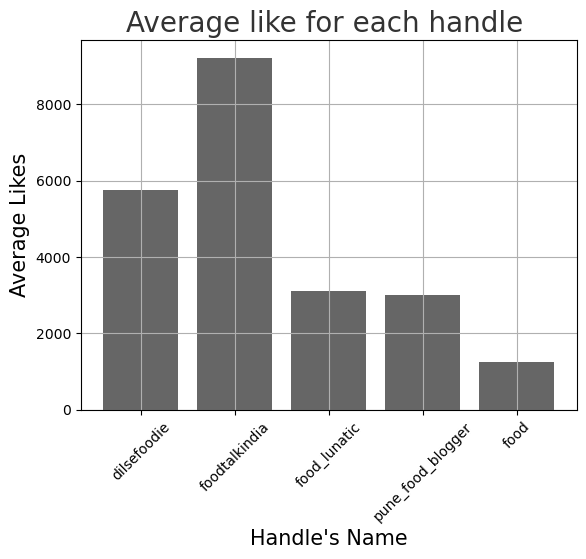

In [168]:
username = list(average_likes_dict.keys())
avg_like = list(average_likes_dict.values())

plt.bar(username,avg_like,color='black',alpha=0.6)
plt.ylabel("Average Likes",size=15)
plt.xlabel("Handle's Name",size=15)
plt.xticks(rotation = 45)
plt.title('Average like for each handle ',fontsize=20,alpha=0.8)
plt.grid()
plt.show()